# (4주차-1) 12월02일
- torch version 1.9.0
- cuda 10.2
- 주제: Fashion-MNIST Classfication 신경망 모델 구성하기
- 작성자: 윤도현

## 라이브러리 import

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## gpu 사용여부 체크

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


## 클래스 정의하기

In [3]:
class NeuralNetwork(nn.Module):
    # 레이어 정의
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
        
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

### 소프트맥스 활성화 함수

소프트맥스 활성화 함수는 다중 클래스 분류에 주로 사용됩니다. 
>why? softmax 함수는 뉴런의 출력값에 대하여 class 분류를 위하여 마지막 단계에서 출력값에 대한 **정규화**를 해주는 함수이다
> 개와 고양이 말 사진이 섞여있는 데이터셋을 분류한다고 예를들어보겠습니다  
사진속 동물이 개인지, 고양이인지, 말인지 확률적으로 수치화 한다고 했을 때 
개(11%), 고양이(29%), 말(60%) 와 같이 확률적 classfication을 할 때 용이합니다.

#### 따라서 기억해야할 것은 softmax 활성화 함수의 특징은 결과물의 수치의 합은 언제나 1 이라는 것입니다.
#### 그래서 fully-connected layer의 마지막 층의 출력값에 softmax 함수를 취해주면 그 값들은 클래스 확률로 변하게 되는겁니다.

In [6]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1], device='cuda:0')


## 모델 계층(Layer)

In [9]:
input_image = torch.rand(3,28,28)
input_image.size()

torch.Size([3, 28, 28])

## nn.Flatten

In [10]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
flat_image.size()

torch.Size([3, 784])

## nn.Linear

In [12]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
hidden1.size()

torch.Size([3, 20])

## nn.ReLU

In [17]:
hidden2 = nn.ReLU()(hidden1)
hidden1, hidden2

(tensor([[-0.3996,  0.2488,  0.4686,  0.0427,  0.0675,  0.2271, -0.0538, -0.1249,
           0.3092, -0.3172, -0.0190, -0.4455, -0.5902,  0.0539, -0.2270,  0.1010,
          -0.1606,  0.1283, -0.1027,  0.2997],
         [ 0.1464, -0.0227,  0.3713, -0.3604,  0.2646,  0.5160,  0.0015, -0.0662,
           0.0177, -0.2986, -0.1600, -0.5430, -0.6402, -0.0399, -0.0341, -0.0565,
          -0.1877, -0.0404, -0.1962,  0.2701],
         [ 0.0825,  0.1540,  0.3875, -0.0050,  0.0494,  0.7528,  0.0656,  0.1895,
           0.0532, -0.1372, -0.2737, -0.5299, -0.5859,  0.0183, -0.2146,  0.0354,
          -0.4782, -0.0865, -0.1940,  0.1993]], grad_fn=<AddmmBackward>),
 tensor([[0.0000, 0.2488, 0.4686, 0.0427, 0.0675, 0.2271, 0.0000, 0.0000, 0.3092,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0539, 0.0000, 0.1010, 0.0000, 0.1283,
          0.0000, 0.2997],
         [0.1464, 0.0000, 0.3713, 0.0000, 0.2646, 0.5160, 0.0015, 0.0000, 0.0177,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

활성화 함수 사용하는 이유? 
> 데이터에 비선형성을 부여하기 위해!!! 

비선형성을 주는 이유? 
> 앞서 살펴본대로 torch.nn.Linear 함수를 이용해 데이터를 선형변환 하였다 

> 하지만 선형변환은 쉽지만 망이 깊어지지 않는 단점이 있다. 

> 신경망으로 설명해보면 Linear 변환을 아무리 해도 hidden layer가 하나밖에 안나온다는 뜻이다.

## nn.Sequential

In [19]:
model1 = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(in_features=20,out_features=10)
)
input_image = torch.rand(3,28,28)
logits = model1(input_image)

https://dororongju.tistory.com/147 참고하면 좋음

## nn.Softmax

In [20]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## 모델 매개변수

torch에서 제공하는 parameters() 함수나 named_parameters() 함수를 이용하면 

신경망 내부 모든 파라미터에 접근할 수 있음

In [21]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0127,  0.0087,  0.0068,  ..., -0.0127,  0.0116, -0.0262],
        [ 0.0065,  0.0057, -0.0134,  ..., -0.0354, -0.0110, -0.0222]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0061, 0.0106], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0383, -0.0263, -0.0341,  ..., -0.0046, -0.0385,  0.0231],
        [-0.0295,  0.0029,  0.0099,  ...,  0.0303,  0.0082,  0.0272]],
       device='cuda:0', grad_fn=<Slic

# (4주차-2) 12월02일
- torch version 1.9.0
- cuda 10.2
- 주제: torch.autograd 함수를 사용한 자동 미분
- 작성자: 윤도현

In [28]:
from IPython.display import Image

In [30]:
pwd

'C:\\Users\\user\\Pytorch_Study'

In [32]:
cd ..

C:\Users\user


# 필요 개념 : 오차 순전파, 역전파

## 합성함수
합성함수란 여러개의 함수로 구성된 함수이다. 

예를들어 z = (x+y)**2 이라는 함수는 아래처럼 두개의 식으로 나누어진다. 

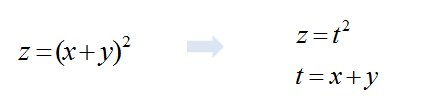

In [34]:
Image("image_file/1.png")

## 연쇄법칙(Chain Rule)
연쇄법칙은 합성함수의 미분에 대한 성질을 뜻하며 정의는 다음과 같다.

**합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.**

따라서 x에 대한 z의 미분은 아래처럼 나타낼 수 있다.

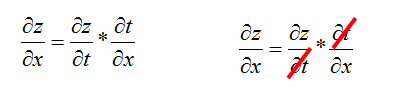

In [35]:
Image("image_file/2.png")

연쇄법칙을 써서 위 식을 미분해 보면 아래처럼 된다.

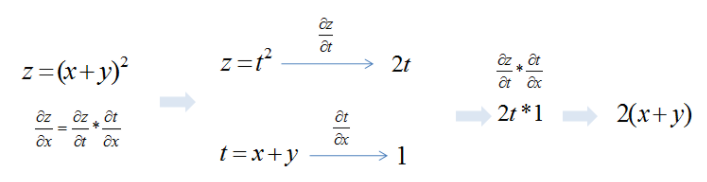

In [36]:
Image("image_file/3.png")

아래 그림에서

파란색 화살표는 순전파(forward propagation), 

빨간색 화살표는 역전파(back propagation)이다. 

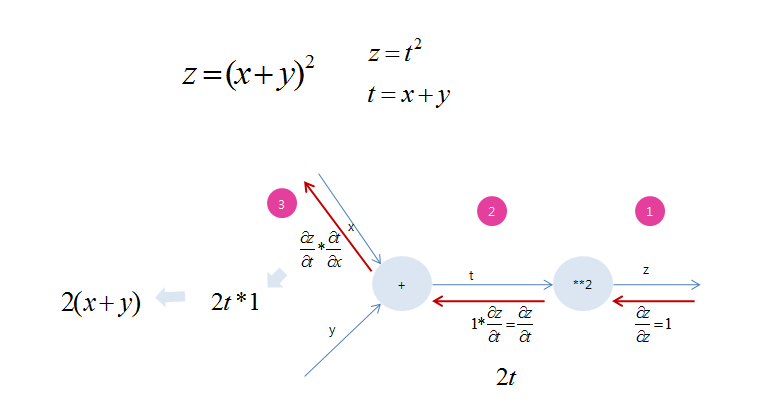

In [37]:
Image("image_file/4.png")

x와 y가 입력값으로 들어와서 덧셈을하고 t라는 변수에 저장된 뒤 제곱하여 z라는 결과값을 순전파에서 얻었습니다. 

이제부터 역전파를 진행해보면

1. 오른쪽에서부터 z에 대해 z를 미분한 값은 1이고
2. Z= t^2 의 미분값은 2t이고, 그러므로 1 x 2t 가 된다. 
3. 앞쪽에서 구해진 미분값인 1 x 2t에 (t=x+y)의 x에대한 미분은 1이기에 최종적으로 1 x 2t x 1이 된다.

그러므로 2t가 되고 t=x+y를 치환하면 결국 z = (x+y)^2의 x에 대한 미분은 2(x+y)가 된다.

# .

In [38]:
import torch 

In [40]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
x,y,w,b,z

(tensor([1., 1., 1., 1., 1.]),
 tensor([0., 0., 0.]),
 tensor([[-1.5349,  0.3529, -0.4940],
         [ 0.4064, -0.5556, -0.9969],
         [-0.5031, -0.2839, -0.5037],
         [ 1.7790, -1.2313, -0.7579],
         [ 0.2335, -0.7556,  0.8982]], requires_grad=True),
 tensor([-0.6300, -1.9261, -0.1361], requires_grad=True),
 tensor([-0.2492, -4.3997, -1.9903], grad_fn=<AddBackward0>))

## gradient 계산하기

신경망에서 parameter의 가중치를 최적화하려면 

parameter에 대한 손실함수의 도함수(derivative)를 계산해야 합니다.

이때 매개변수 = w, b 이다.

In [42]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1460, 0.0040, 0.0401],
        [0.1460, 0.0040, 0.0401],
        [0.1460, 0.0040, 0.0401],
        [0.1460, 0.0040, 0.0401],
        [0.1460, 0.0040, 0.0401]])
tensor([0.1460, 0.0040, 0.0401])


## gradient 추적 멈추기

역전파 안하고 pre-trained model을 불러와서 단순히 데이터 입력하기만 하는 경우와 같이 순전파 연산만 할때 이러한 gradient 추적 필요없음

In [43]:
z = torch.matmul(x,w)+b
print(z.requires_grad)

with torch.no_grad():
    z= torch.matmul(x,w)+b
print(z.requires_grad)

True
False


>gradient 추적을 멈추는 이유?
- gradient 추적하지 않는 텐서의 연산이 더 효율적이어서 연산속도가 향상됨
- (**가장 중요!!**) 신경망의 일부 매개변수 (cnn에서 feature를 추출하는 부분의 매개변수 등)를 학습되지 않도록 고정하기 위해
- pre-trained 된 model을 fine-tuning 할때 일부의 매개변수만 업데이트 해야하는 경우가 많으므로 필수적!!

# (4주차-3) 12월02일
- torch version 1.9.0
- cuda 10.2
- 주제: model parameter 최적화
- 작성자: 윤도현

## 베이스라인 코드

## (1. 데이터셋 불러오기, 2. 불러온 데이터셋으로 데이터 로더 생성, 3. 모델 정의)

In [44]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

C:\Users\user\anaconda3\envs\bda2021\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [46]:
training_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 4.손실함수, 옵티마이저 정의

In [47]:
learning_rate = 0.001
batch_size = 64
epochs = 50

In [48]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 5. Training

In [49]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.318594  [    0/60000]
loss: 2.309781  [ 6400/60000]
loss: 2.293948  [12800/60000]
loss: 2.277633  [19200/60000]
loss: 2.268039  [25600/60000]
loss: 2.248342  [32000/60000]
loss: 2.242460  [38400/60000]
loss: 2.222405  [44800/60000]
loss: 2.215239  [51200/60000]
loss: 2.185772  [57600/60000]
Test Error: 
 Accuracy: 51.9%, Avg loss: 2.181395 

Epoch 2
-------------------------------
loss: 2.188875  [    0/60000]
loss: 2.184662  [ 6400/60000]
loss: 2.134859  [12800/60000]
loss: 2.141693  [19200/60000]
loss: 2.102097  [25600/60000]
loss: 2.054466  [32000/60000]
loss: 2.065920  [38400/60000]
loss: 2.005955  [44800/60000]
loss: 1.997730  [51200/60000]
loss: 1.934274  [57600/60000]
Test Error: 
 Accuracy: 56.4%, Avg loss: 1.931634 

Epoch 3
-------------------------------
loss: 1.959896  [    0/60000]
loss: 1.940751  [ 6400/60000]
loss: 1.830888  [12800/60000]
loss: 1.859903  [19200/60000]
loss: 1.764448  [25600/60000]
loss: 1.711034  [32000/600